# Notebook for analyzing my ecg data


### 1) Import all necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
#import spectrum
import statsmodels.api as sma
from statsmodels.tsa.stattools import pacf, adfuller
from scipy.stats import boxcox
from scipy import signal
import warnings
from datetime import datetime
import pprint

In [6]:

##############################
# Suppress Warnings Settings and Pretty Print Settings
##############################

# suppress warnings completely
warnings.filterwarnings('ignore')

# suppress warnings after seen once
# warnings.filterwarnings(action='once')

# pretty print settings
pp = pprint.PrettyPrinter(indent=4)

### 2) Select Data and view them in data frames

In [104]:
##############################
# Import Dataset
##############################

# import dataset from csv
dataframe = pd.read_csv(r'D:\5th\Project\Time series analysis\dataset\sample1.csv', engine='python')

# select lead to be used
lead = 'II'



In [115]:
# seperate data for hold out (split) testing
use_dataframe = dataframe.iloc[225:1225][lead]
test_dataframe=dataframe.iloc[1225:2225][lead]
test_dataframe2=dataframe.iloc[1324:2324][lead]

test_dataframe3 = dataframe.iloc[2405:3405][lead]

# values of time series data
y = use_dataframe.values
y_test = test_dataframe.values

In [20]:
# dataset head
dataframe.head(5)

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,243,103,-140,-173,192,-18,254,1003,911,368,193,166
1,135,104,-31,-119,85,38,-98,246,204,165,159,172
2,138,112,-26,-122,83,41,-80,244,205,163,157,170
3,141,116,-25,-128,84,45,-49,269,230,169,154,170
4,143,114,-29,-129,87,44,-19,300,264,178,153,166


In [24]:
# dataset characteristics
dataframe.describe()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
count,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000,150180.000000
mean,47.093734,66.266227,19.649967,-55.706486,14.217532,42.966067,-80.321814,69.692023,69.834718,79.667865,77.752291,83.262658
std,80.081727,152.649668,97.388297,111.742060,46.080251,121.611557,103.936535,191.066840,199.795102,198.254225,192.171055,164.217236
min,-305.000000,-512.000000,-469.000000,-849.000000,-256.000000,-460.000000,-693.000000,-600.000000,-680.000000,-728.000000,-676.000000,-620.000000
25%,8.000000,8.000000,-25.000000,-69.000000,-8.000000,-4.000000,-134.000000,-41.000000,-37.000000,3.000000,4.000000,20.000000
50%,25.000000,31.000000,2.000000,-26.000000,10.000000,16.000000,-74.000000,6.000000,8.000000,34.000000,33.000000,45.000000
75%,59.000000,69.000000,29.000000,-9.000000,35.000000,40.000000,-13.000000,140.000000,125.000000,82.000000,78.000000,84.000000
max,696.000000,1076.000000,622.000000,405.000000,245.000000,835.000000,273.000000,1086.000000,1281.000000,1463.000000,1406.000000,1255.000000


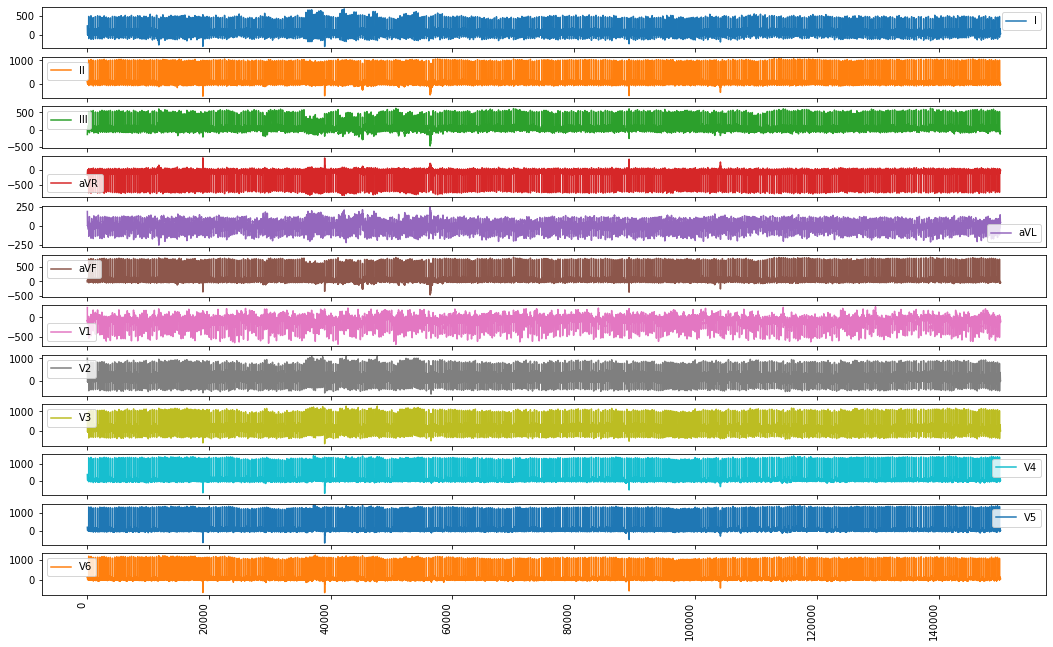

In [32]:
##############################
# Visualize Data from all leads
##############################

dataframe.plot(figsize=(18, 12), subplots=True)
plt.xticks(rotation=90)
plt.show()

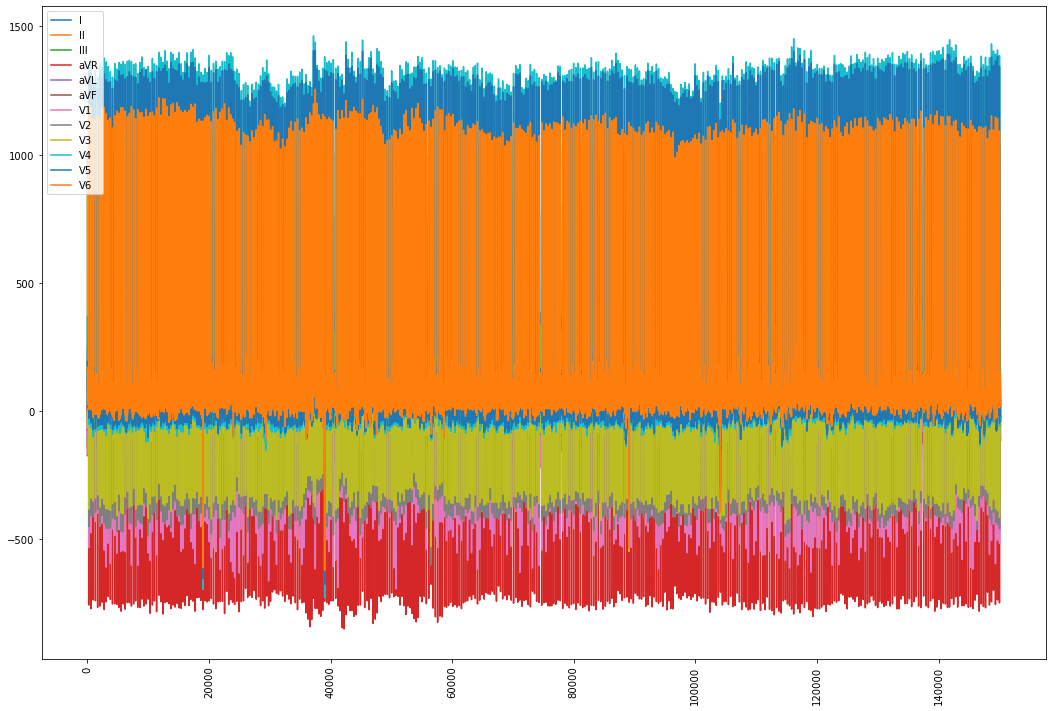

In [36]:
dataframe.plot(figsize=(18, 12))
plt.xticks(rotation=90)
## plt.savefig('all.pdf')
plt.show()

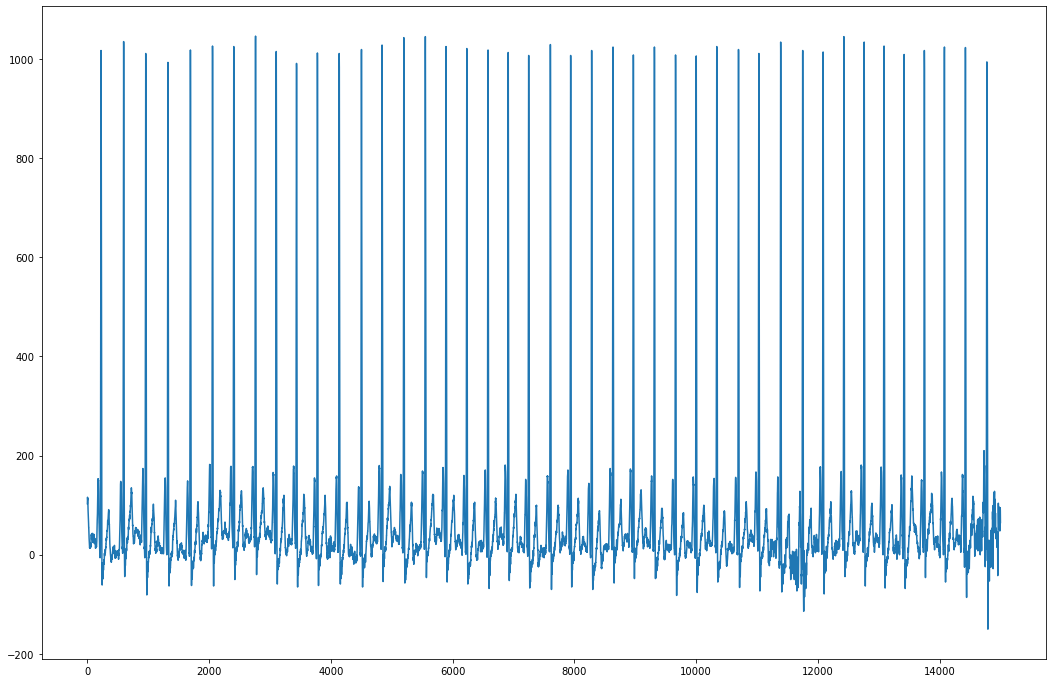

In [42]:
dataframe.iloc[0:15000][lead].plot(figsize=(18, 12))

plt.show()

In [47]:
a,b=signal.find_peaks(dataframe.iloc[0:15000][lead],height=400)

In [48]:
a


array([  225,   596,   959,  1324,  1693,  2056,  2405,  2763,  3103,
        3436,  3779,  4137,  4503,  4841,  5198,  5552,  5892,  6233,
        6582,  6913,  7250,  7606,  7939,  8284,  8635,  8969,  9315,
        9662, 10002, 10339, 10696, 11031, 11389, 11751, 12086, 12427,
       12761, 13087, 13417, 13749, 14079, 14424, 14776], dtype=int64)

In [65]:
#aa=signal.peak_widths(dataframe.iloc[0:15000][lead],a,rel_height=1.0)

In [73]:
#start the use data frame with 225 -1225
#                              1225 -2225  therfore 1324 - 2324 
#                              2405-3405
                                                                     

In [74]:
A=pd.DataFrame(a)

In [91]:
B=A.shift(1)
B=B.dropna()



In [94]:
C=A-B

In [102]:
#C

In [99]:
596-225


371

In [98]:
776-424

352

In [100]:
C.mean()

0    346.452381
dtype: float64

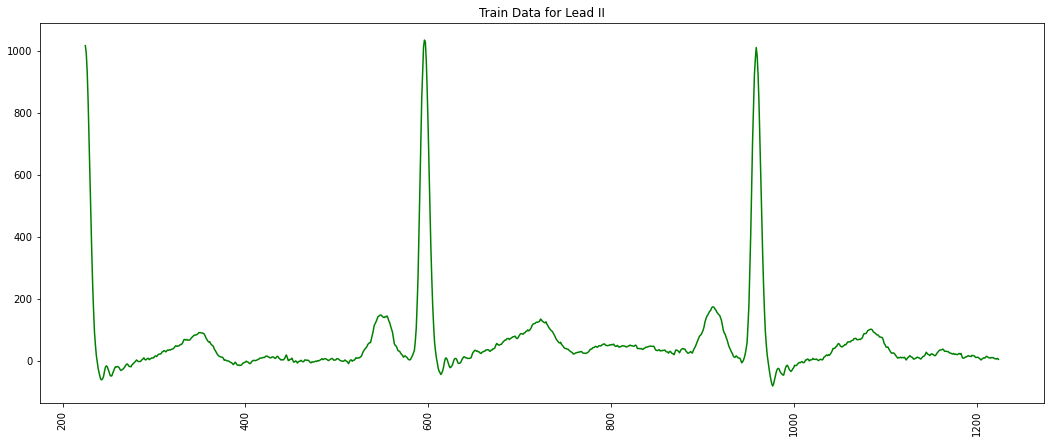

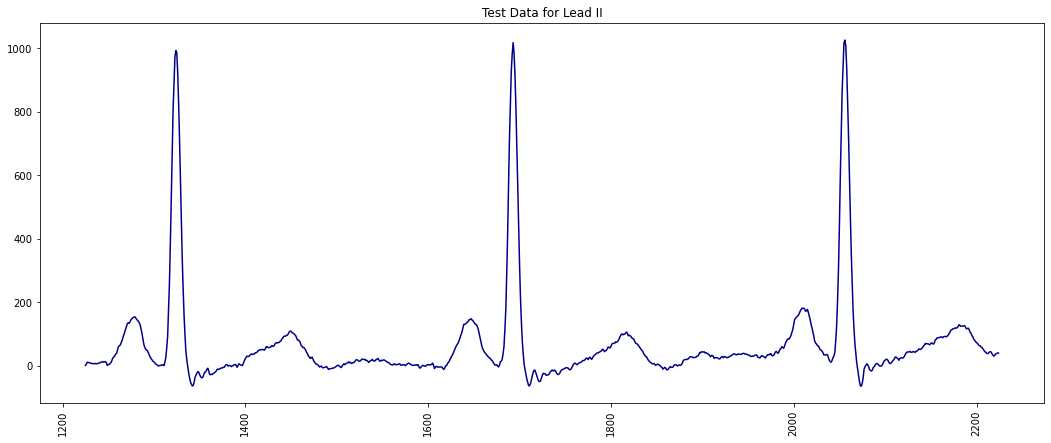

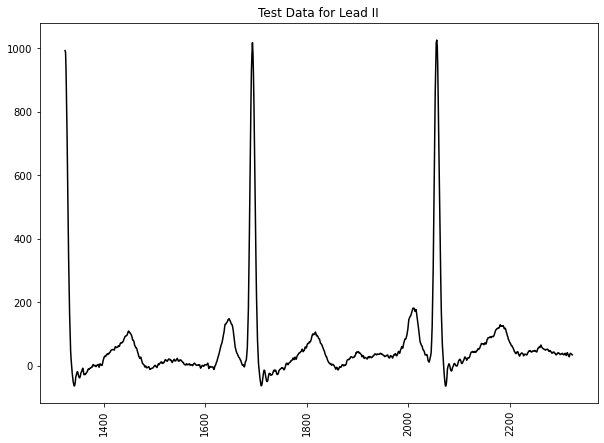

In [117]:
# Visualize Data from Selected Lead
##############################

use_dataframe.plot(figsize=(18, 7), color='g')
plt.title('Train Data for Lead {}'.format(lead))
plt.xticks(rotation=90)
plt.show()

test_dataframe.plot(figsize=(18, 7), color='darkblue')
plt.title('Test Data for Lead {}'.format(lead))
plt.xticks(rotation=90)
plt.show()

test_dataframe2.plot(figsize=(10, 7), color='black')
plt.title('Test Data for Lead {}'.format(lead))
plt.xticks(rotation=90)
plt.show()





In [151]:
def stationarity(timeseries):
    wind=365
    rolmean=timeseries.rolling(window=wind).mean()
    rolstd=timeseries.rolling(window=wind).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

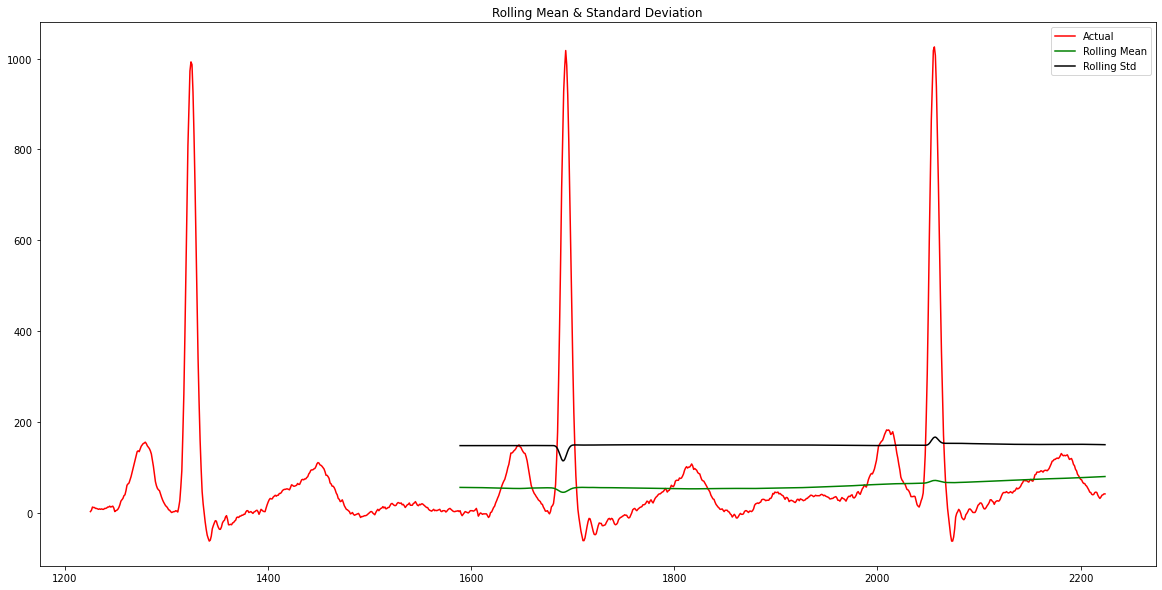

Dickey-Fuller Test: 
Test Statistic           -5.065929
p-value                   0.000016
Lags Used                22.000000
No. of Obs              977.000000
Critical Value (1%)      -3.437061
Critical Value (5%)      -2.864503
Critical Value (10%)     -2.568348
dtype: float64


In [152]:
stationarity(test_dataframe)


## analysis part



In [163]:
A=use_dataframe.max(0)
A

1035

In [167]:
Use_dataframe=use_dataframe.div(1500)

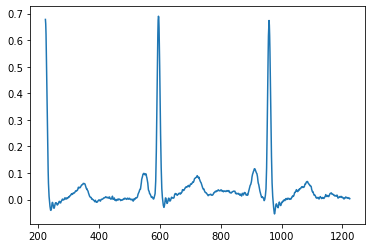

In [168]:
plt.plot(Use_dataframe)

####  
     A) Box Cox Tranformation
    

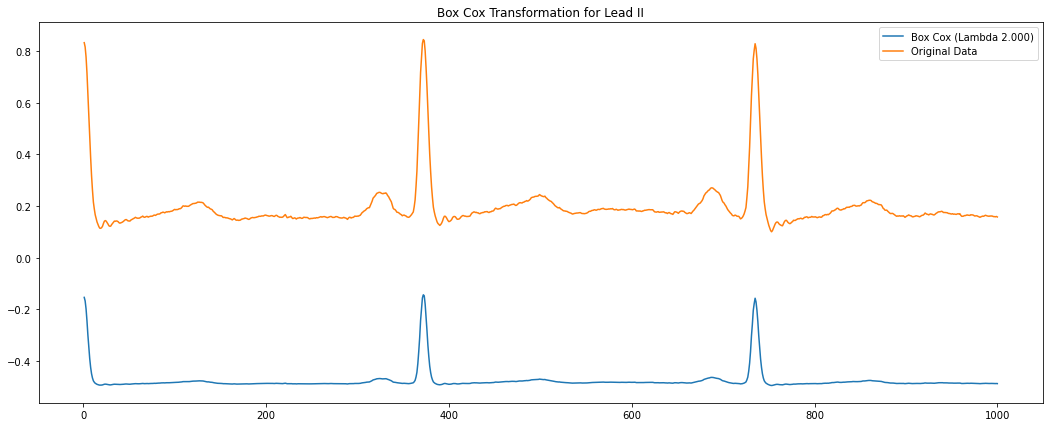

In [169]:
##############################
# Visualize Box Cox Transformation
##############################

# make df positive by adding constant
constant = Use_dataframe.min(0)
positive_dataframe = Use_dataframe + np.abs(constant) + 0.1

# box cox transformation
lmbda = 2
Y_boxcox = boxcox(positive_dataframe, lmbda)

# plot box cox transform
x_vals = np.arange(1, 1001)
plt.subplots(figsize=(18, 7))
plt.title('Box Cox Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_boxcox, label='Box Cox (Lambda {:0.3f})'.format(lmbda))

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()


### log transformation

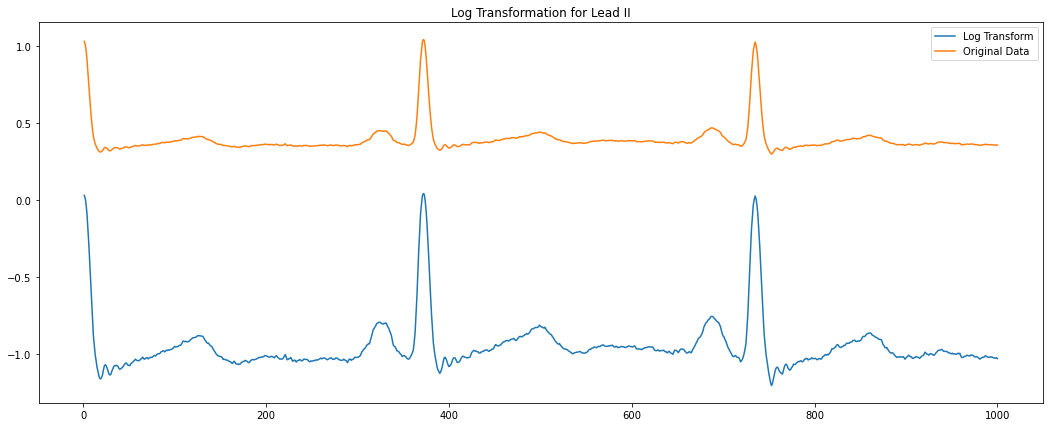

In [171]:
##############################
# Visualize Log transformation
##############################

# make df positive by adding constant
constant = Use_dataframe.min(0)
positive_dataframe = Use_dataframe + np.abs(constant) + 0.3

# log transformation
Y_log = positive_dataframe.apply(np.log)

# plot log transform
x_vals = np.arange(1, 1001)
plt.subplots(figsize=(18, 7))
plt.title('Log Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_log, label='Log Transform')

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()

In [172]:
constant

-0.054

### square root tranformation

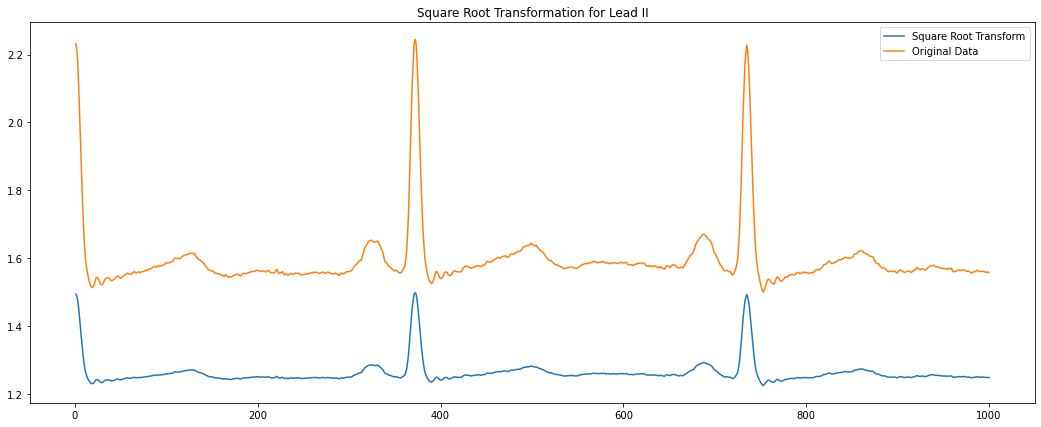

In [173]:
##############################
# Visualize Square Root Transformation
##############################

# make df positive by adding constant
constant = Use_dataframe.min(0)
positive_dataframe = Use_dataframe + np.abs(constant) + 1.5

# sqrt transformation
Y_sqrt = positive_dataframe.apply(np.sqrt)

# plot sqrt transform
x_vals = np.arange(1, 1001)
plt.subplots(figsize=(18, 7))
plt.title('Square Root Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_sqrt, label='Square Root Transform')

# plot original data
plt.plot(x_vals, positive_dataframe.values, label='Original Data')

plt.legend()
plt.show()

### power transformation 

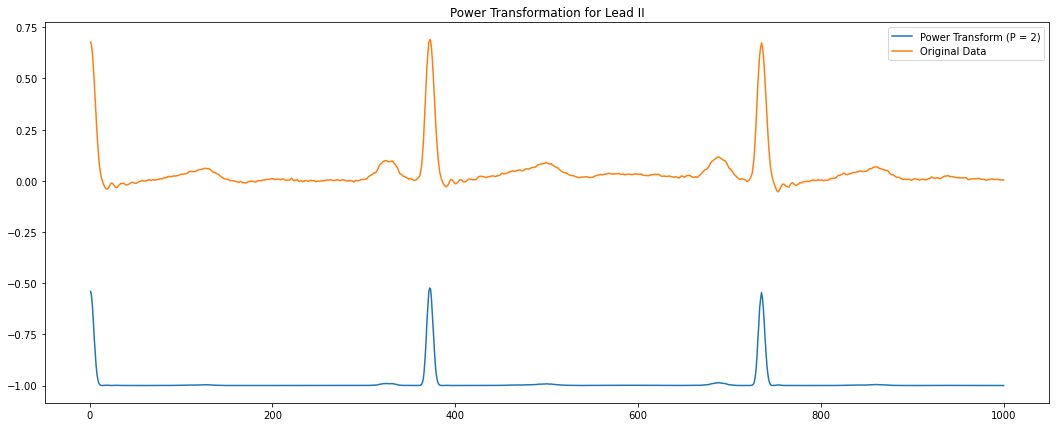

In [175]:
##############################
# Visualize Power Transformation
##############################

# power transformation
power = 2
Y_power = Use_dataframe ** power - 1

# plot sqrt transform
x_vals = np.arange(1, 1001)
plt.subplots(figsize=(18, 7))
plt.title('Power Transformation for Lead {}'.format(lead))
plt.plot(x_vals, Y_power, label='Power Transform (P = {})'.format(power))

# plot original data
plt.plot(x_vals, Use_dataframe.values, label='Original Data')

plt.legend()
plt.show()


## Model Identification

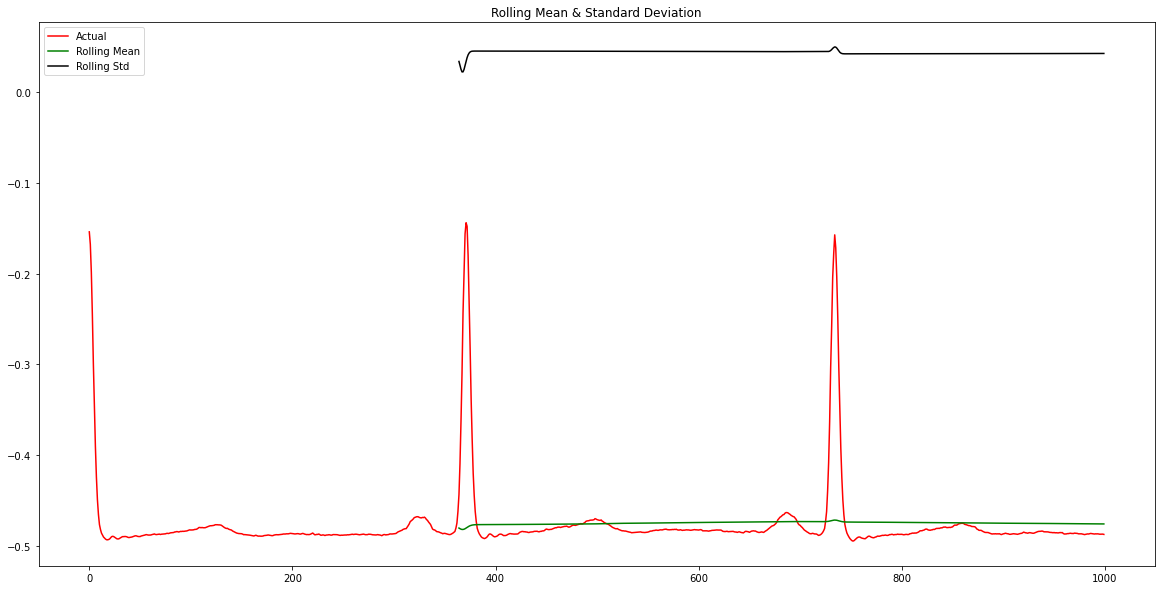

Dickey-Fuller Test: 
Test Statistic         -6.122071e+00
p-value                 8.806341e-08
Lags Used               1.900000e+01
No. of Obs              9.800000e+02
Critical Value (1%)    -3.437040e+00
Critical Value (5%)    -2.864494e+00
Critical Value (10%)   -2.568343e+00
dtype: float64


In [178]:
df_boxcox = pd.Series(Y_boxcox)
stationarity(df_boxcox)


### plot acf and pacf

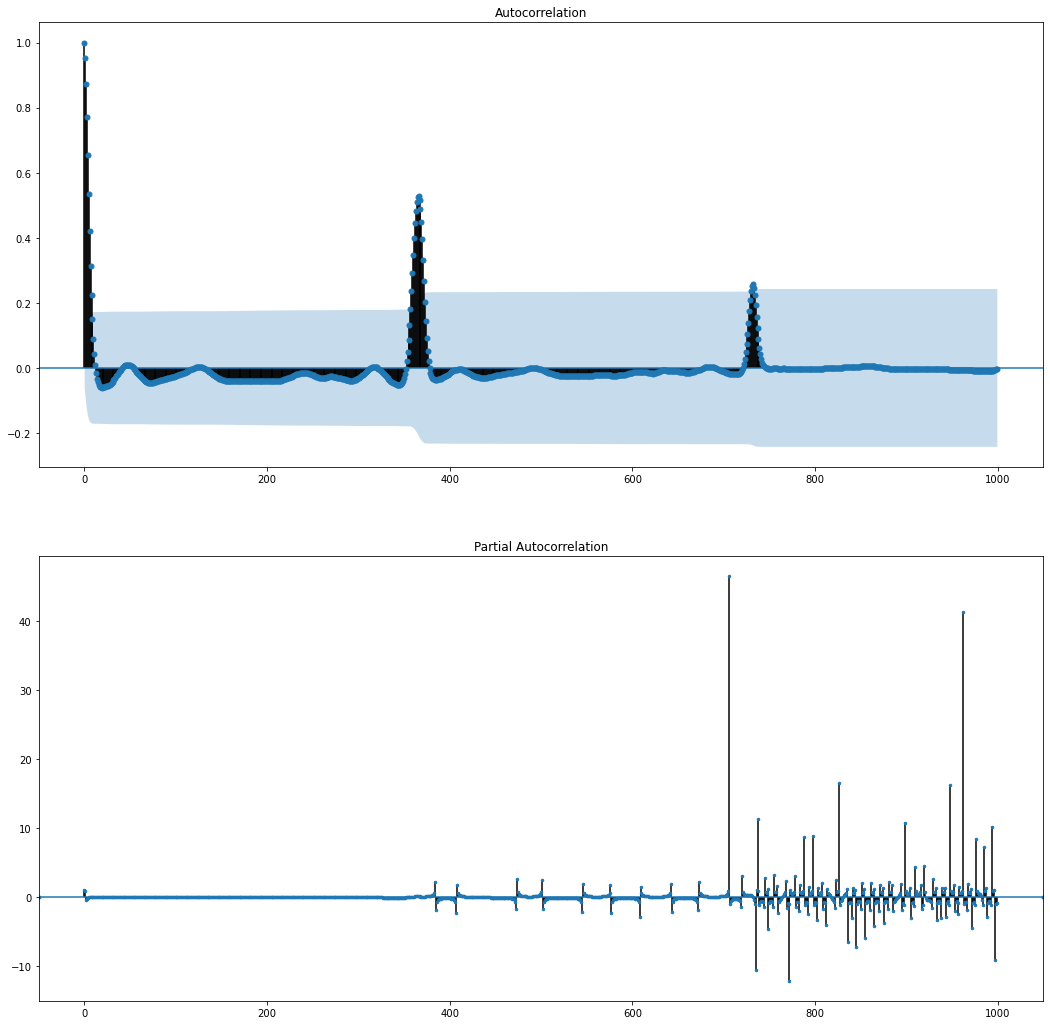

In [184]:
##############################
# Plot ACF and PACF
##############################

y = Y_boxcox

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(y, lags=999, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(y, lags=999, ax=ax2, **{'marker': '.'})
plt.show()


1000

## Spectogram Plot

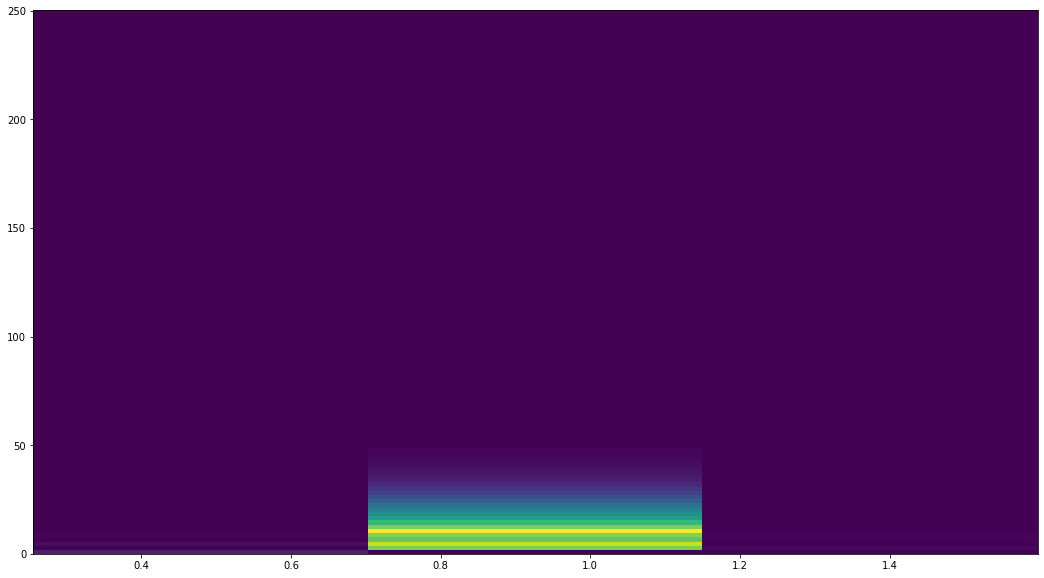

In [186]:
##############################
# Plot Magnitude Spectrum for freq=375
##############################
fs = 500.6
f, t, Sxx = signal.spectrogram(df_boxcox, fs, scaling='density')

fig = plt.figure(figsize=(18,10))
plt.pcolormesh(t, f, Sxx)
plt.show()

## Spectral Analysis 

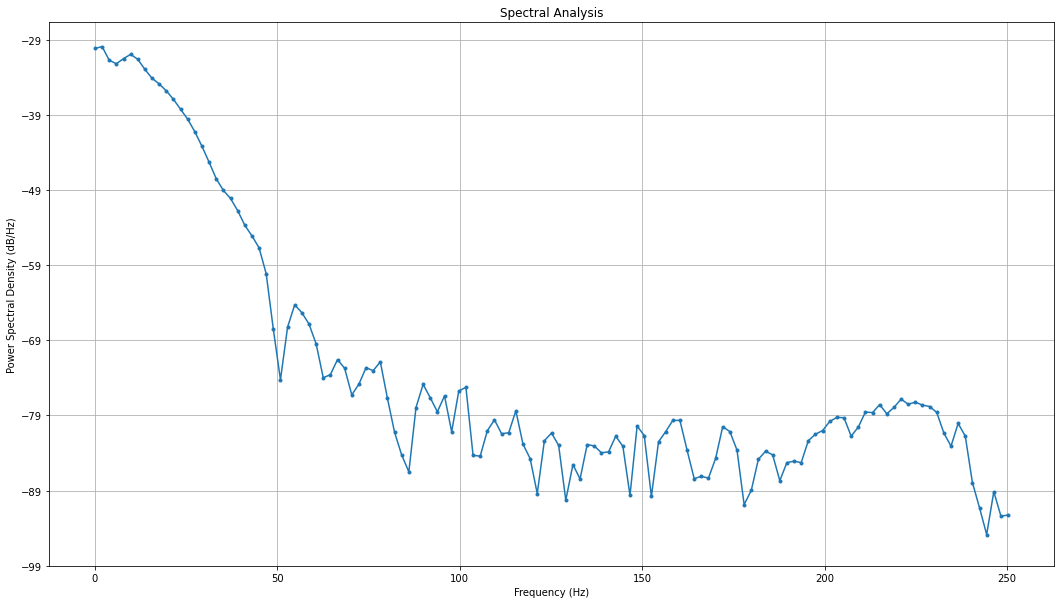

In [197]:
##############################
# Using Periodogram
##############################

# f = 3000

fig = plt.figure(figsize=(18,10))


plt.psd(Use_dataframe,Fs=500.6,marker='.')
plt.xlabel('Frequency (Hz)')
plt.title('Spectral Analysis')
plt.show()

## Seasonal differencing

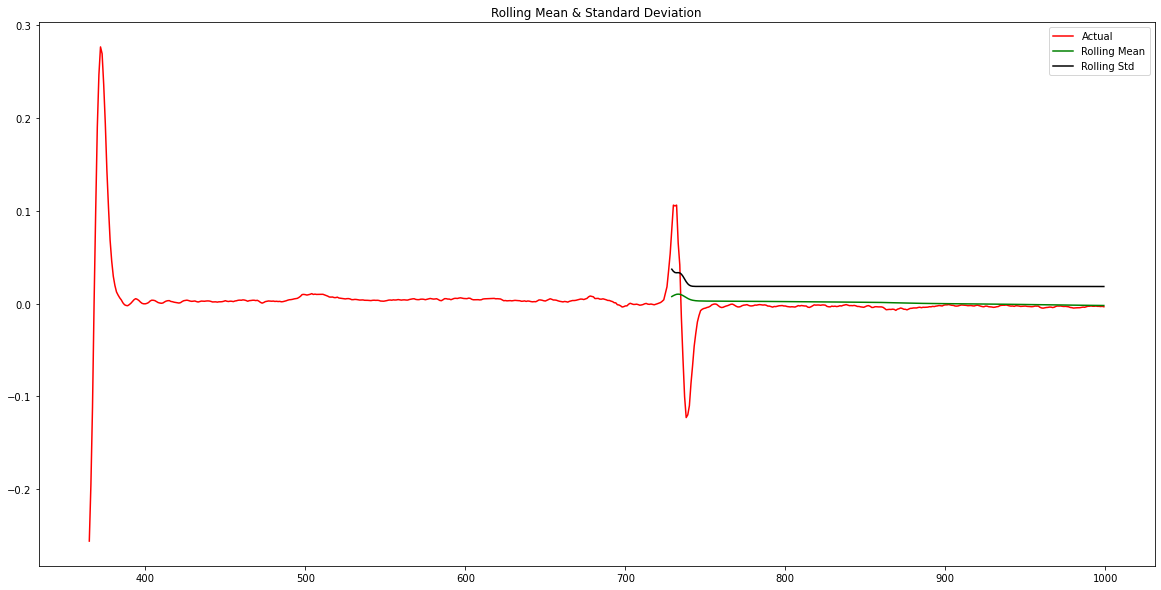

Dickey-Fuller Test: 
Test Statistic         -8.572669e+00
p-value                 8.118122e-14
Lags Used               1.300000e+01
No. of Obs              6.210000e+02
Critical Value (1%)    -3.440924e+00
Critical Value (5%)    -2.866205e+00
Critical Value (10%)   -2.569255e+00
dtype: float64


In [204]:
##############################
# Apply Seasonal Differencing
##############################

df_seasonal_diff = df_boxcox - df_boxcox.shift(365)
df_seasonal_diff.dropna(inplace=True)

stationarity(df_seasonal_diff)

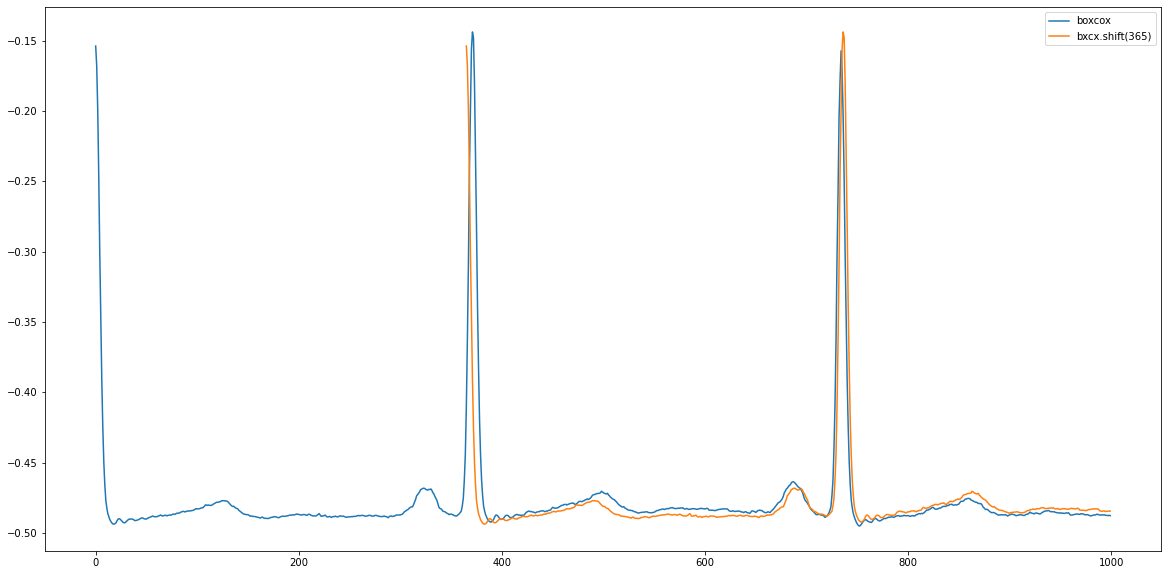

In [208]:
plt.figure(figsize=(20,10))
plt.plot(df_boxcox,label='boxcox')
plt.plot(df_boxcox.shift(365),label='bxcx.shift(365)')
plt.legend()

In [209]:
## acf and pcf of seasonal diff

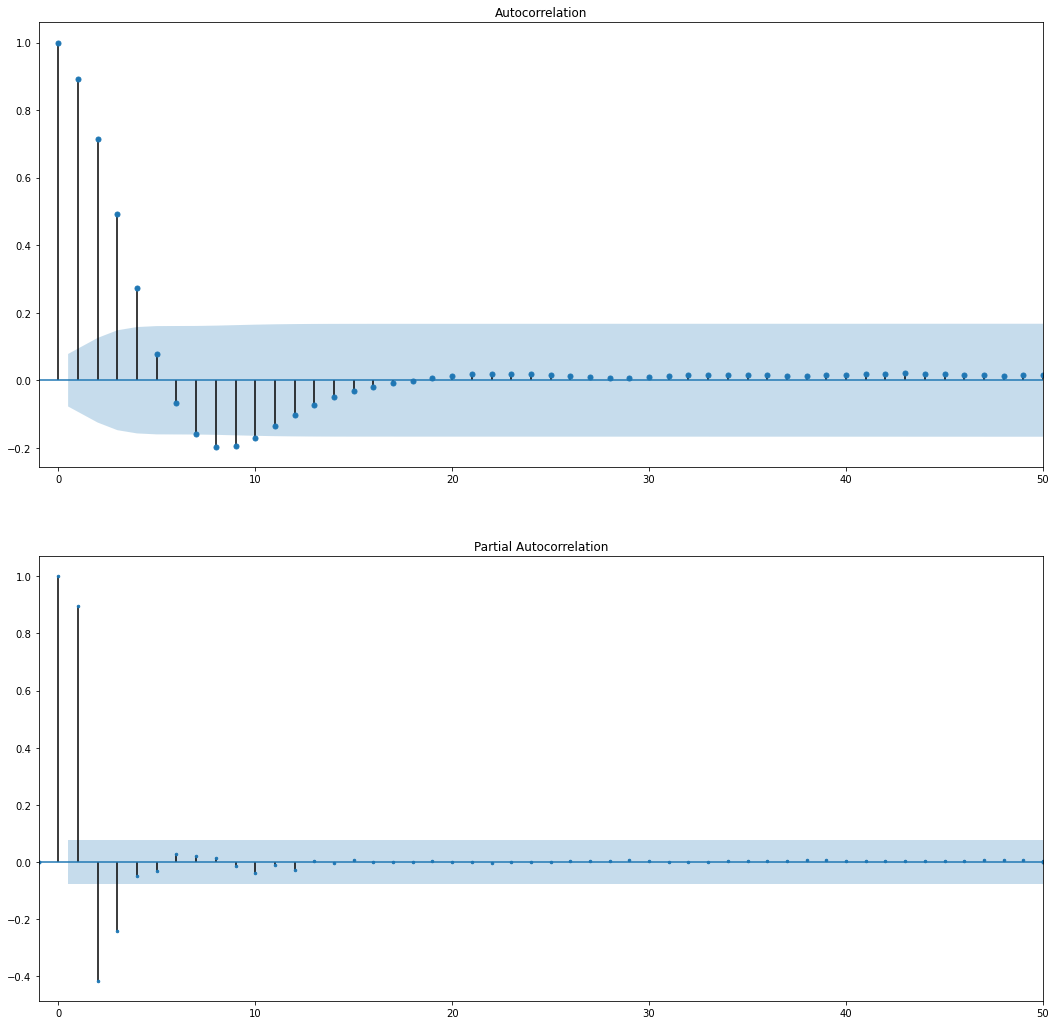

In [210]:
##############################
# Plot ACF and PACF
##############################

y = df_seasonal_diff.values

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(y, lags=50, ax=ax1)
plt.xlim([-1, 50])
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(y, lags=50, ax=ax2, **{'marker': '.'})
plt.xlim([-1, 50])
plt.show()


## sesonal decomposition

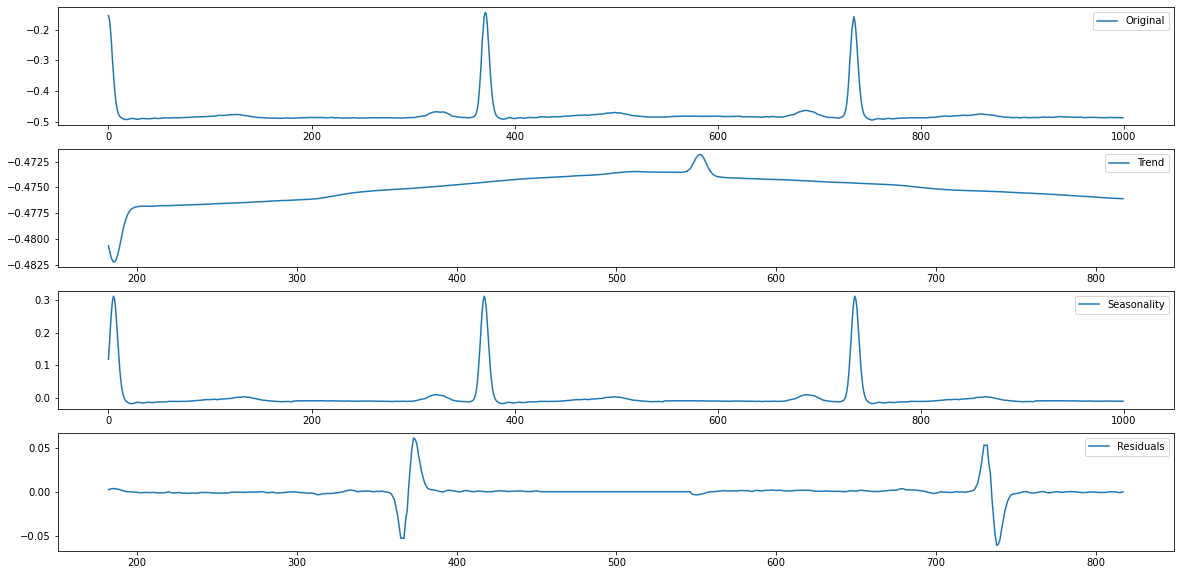

In [218]:
##############################
# Decompose the Transformed Data
##############################
decomp = sm.tsa.seasonal.seasonal_decompose(df_boxcox , model='additive', freq=365)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.figure(figsize=(20,10))

plt.subplot(411)
plt.plot(df_boxcox, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#plt.tight_layout()


## Parameter Estimation and AIC Score

In [220]:
%%time
##############################
# Build ARIMA (10,0,0)
##############################

model = sm.tsa.arima_model.ARIMA(df_boxcox, order=(4, 1, 0))
model_deseason_1 = model.fit()
print(model_deseason_1.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(4, 1, 0)   Log Likelihood                4872.899
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 07 May 2020   AIC                          -9733.798
Time:                        05:01:31   BIC                          -9704.358
Sample:                             1   HQIC                         -9722.608
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.525      0.599      -0.001       0.000
ar.L1.D.y      1.1153      0.032     35.358      0.000       1.054       1.177
ar.L2.D.y      0.4232      0.041     10.353      0.0

plotting ARIMA model


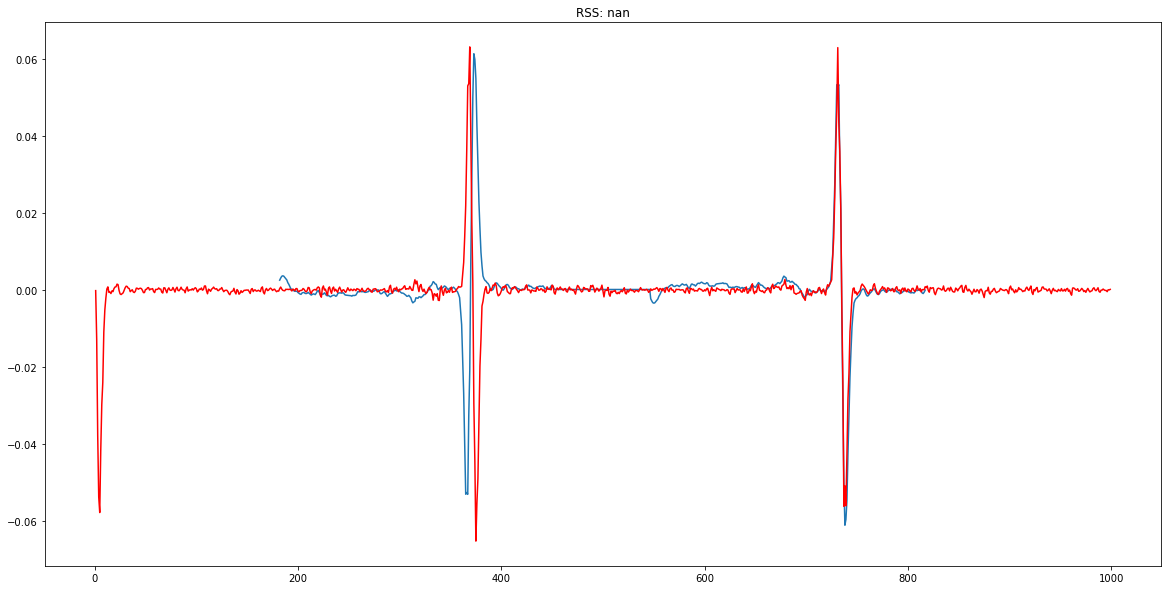

In [236]:
results=model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(residual)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-residual)**2))
print('plotting ARIMA model')

In [232]:
results.fittedvalues[365:]


366    0.036145
367    0.053012
368    0.053591
369    0.063140
370    0.039913
         ...   
995   -0.000128
996   -0.000448
997    0.000052
998    0.000002
999    0.000147
Length: 634, dtype: float64

In [ ]:
%%time
##############################
# Build SARIMA (1,1,0)x(1,0,0)s
##############################

model = sm.tsa.statespace.sarimax.SARIMAX(df_boxcox, order=(1,1,0), seasonal_order=(1,0,0,365))
model_4 = model.fit()
print(model_4.summary())


MemoryError: Unable to allocate 1.00 GiB for an array with shape (367, 367, 1001) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 974, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
